<a href="https://colab.research.google.com/github/sHaRqKh/Loan-Approval/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction

## Problem
A model that predict the user is eligible for loan or not When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

• If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

• If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Data
Rows: 39717  ,  Columns: 111

Source: Kaggle

Google Collab: Github - Sharique Ahmad

In [1]:
#Importing Imp library
import pandas as pd
import numpy as np

In [2]:
#Accessing dataset
df = pd.read_csv(r"/content/drive/MyDrive/loan.csv",  sep=',', index_col=False, dtype='unicode')

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [4]:
#Description
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,...,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,59006,953864,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [5]:
#for infer the type of data in each
inf = df.dtypes

In [7]:
#Checking for null vlaue
n = df.isna().sum()

In [8]:
n

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
#Column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

###Droping the member id and id because they are unique

In [10]:
df.drop(['id', 'member_id'], inplace = True, axis = 1)

####There so many coulumn with nan entries we have to drop those columns

#####Here you can see that I use 5 times same code because it's doesn't give me by
#####running 1 time so you have to run it 5 times and I am not able find an alternate     


In [11]:
for i in range (0, 109):
  try:
    d =  df.columns
    if df.iloc[:, i:i+1].isna().sum()[0] > 12000:
       df.drop(d[i], inplace = True, axis = 1)
  except IndexError as NameError:
        pass

In [12]:
for i in range (0, 109):
  try:
    d =  df.columns
    if df.iloc[:, i:i+1].isna().sum()[0] > 12000:
       df.drop(d[i], inplace = True, axis = 1)
  except IndexError as NameError:
        pass

In [13]:
for i in range (0, 109):
  try:
    d =  df.columns
    if df.iloc[:, i:i+1].isna().sum()[0] > 12000:
       df.drop(d[i], inplace = True, axis = 1)
  except IndexError as NameError:
        pass

In [14]:
for i in range (0, 109):
  try:
    d =  df.columns
    if df.iloc[:, i:i+1].isna().sum()[0] > 12000:
       df.drop(d[i], inplace = True, axis = 1)
  except IndexError as NameError:
        pass

In [15]:
for i in range (0, 109):
  try:
    d =  df.columns
    if df.iloc[:, i:i+1].isna().sum()[0] > 12000:
       df.drop(d[i], inplace = True, axis = 1)
  except IndexError as NameError:
        pass

In [16]:
#Checking again nan value presence
n =  df.isna().sum()

In [17]:
#I use simple Imputer for null value imputer
#For Imputation nan value
from sklearn.impute import SimpleImputer

In [18]:
#There are relaibility if I apply mode in all feature
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [19]:
df['emp_title'] = pd.DataFrame(mode_imputer.fit_transform(df[['emp_title']]))
df['emp_length'] = pd.DataFrame(mode_imputer.fit_transform(df[['emp_length']]))
df['revol_util'] = pd.DataFrame(mode_imputer.fit_transform(df[['revol_util']]))
df['title'] = pd.DataFrame(mode_imputer.fit_transform(df[['title']]))
df['last_pymnt_d'] = pd.DataFrame(mode_imputer.fit_transform(df[['last_pymnt_d']]))
df['last_credit_pull_d'] = pd.DataFrame(mode_imputer.fit_transform(df[['last_credit_pull_d']]))
df['collections_12_mths_ex_med'] = pd.DataFrame(mode_imputer.fit_transform(df[['collections_12_mths_ex_med']]))
df['chargeoff_within_12_mths'] = pd.DataFrame(mode_imputer.fit_transform(df[['chargeoff_within_12_mths']]))
df['pub_rec_bankruptcies'] = pd.DataFrame(mode_imputer.fit_transform(df[['pub_rec_bankruptcies']]))
df['tax_liens'] = pd.DataFrame(mode_imputer.fit_transform(df[['tax_liens']]))

In [20]:
#Checking the null value again
n =  df.isna().sum()

In [21]:
n

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

Now, there no null value present in dataset

In [22]:
df.dtypes

loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
term                          object
int_rate                      object
installment                   object
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                    object
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
url                           object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                           object
delinq_2yrs                   object
earliest_cr_line              object
inq_last_6mths                object
open_acc                      object
pub_rec                       object
r

In [23]:
# Now, I convert 'Object' into 'float64' and 'int64' type. 
def integer(i):
  df[i] = df[i].astype('int64')
def float6(i):
  df[i] = df[i].astype('float64')

In [24]:
float6("funded_amnt")
float6("delinq_2yrs")
float6("inq_last_6mths")
float6("open_acc")
float6("pub_rec")
float6("revol_bal")
float6("total_acc")
float6("out_prncp")
float6("out_prncp_inv")
float6("total_rec_late_fee")
float6("collections_12_mths_ex_med")
float6("policy_code")
float6("acc_now_delinq")
float6("chargeoff_within_12_mths")
float6("delinq_amnt")
float6("pub_rec_bankruptcies")
float6("tax_liens")

In [25]:
float6("funded_amnt_inv")
float6("installment")
float6("dti")
float6("annual_inc")
float6("total_pymnt")
float6("total_pymnt_inv")
float6("total_rec_prncp")
float6("total_rec_int")
float6("recoveries")
float6("collection_recovery_fee")
float6("last_pymnt_amnt")
float6("loan_amnt")

In [26]:
df.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

###Visualization
###Univariate Analysis

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

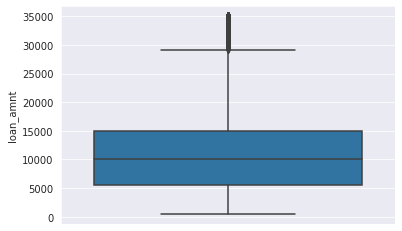

In [28]:
sns.boxplot(y = "loan_amnt", data = df)

(array([5033., 9891., 8108., 5121., 4155., 3166., 1228., 1733.,  489.,
         793.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <a list of 10 Patch objects>)

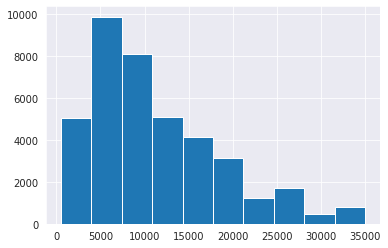

In [29]:
plt.hist(df["loan_amnt"])

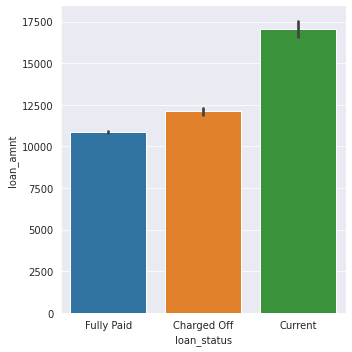

In [30]:
sns.catplot(x = "loan_status", y = "loan_amnt", kind="bar", data=df)

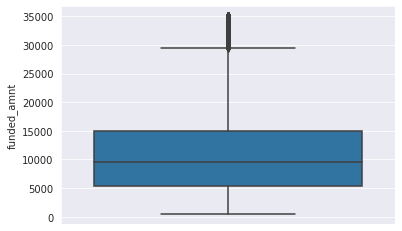

In [31]:
sns.boxplot(y = "funded_amnt", data = df)

(array([ 5079., 10085.,  8246.,  5284.,  4260.,  3016.,  1182.,  1474.,
          439.,   652.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <a list of 10 Patch objects>)

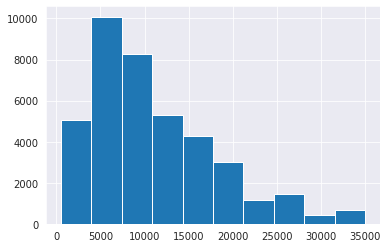

In [32]:
plt.hist(df["funded_amnt"])

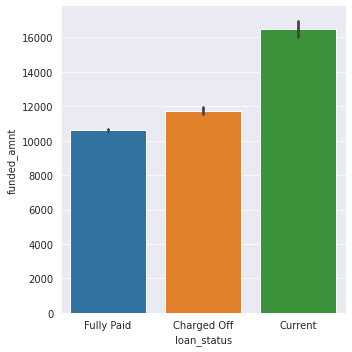

In [33]:
sns.catplot(x = "loan_status", y = "funded_amnt", kind="bar", data=df)

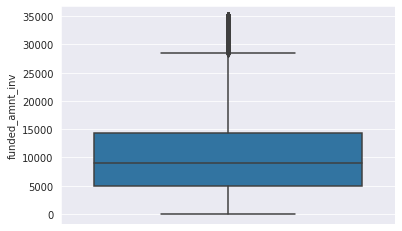

In [34]:
sns.boxplot(y = "funded_amnt_inv", data = df)

(array([5447., 9846., 8761., 5161., 4236., 2729., 1395., 1075.,  463.,
         604.]),
 array([    0.,  3500.,  7000., 10500., 14000., 17500., 21000., 24500.,
        28000., 31500., 35000.]),
 <a list of 10 Patch objects>)

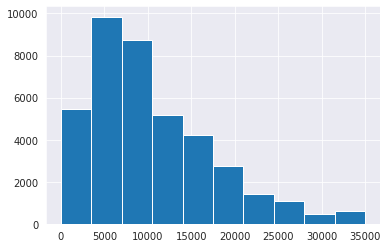

In [35]:
plt.hist(df["funded_amnt_inv"])

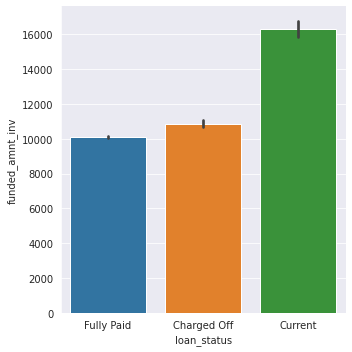

In [36]:
sns.catplot(x = "loan_status", y = "funded_amnt_inv", kind="bar", data=df)

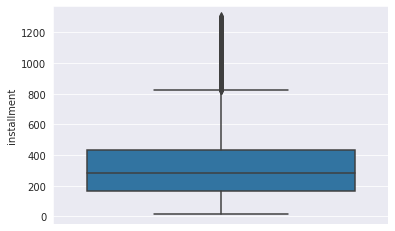

In [37]:
sns.boxplot(y = "installment", data = df)

(array([ 7521., 11767.,  9280.,  5211.,  2666.,  1519.,  1308.,   233.,
          139.,    73.]),
 array([  15.69,  144.64,  273.59,  402.54,  531.49,  660.44,  789.39,
         918.34, 1047.29, 1176.24, 1305.19]),
 <a list of 10 Patch objects>)

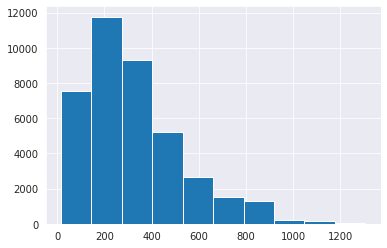

In [38]:
plt.hist(df["installment"])

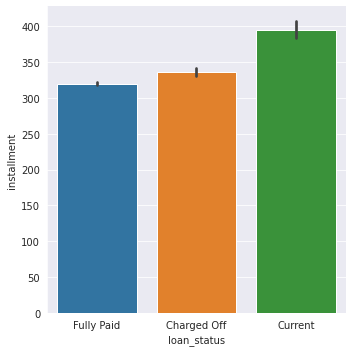

In [39]:
sns.catplot(x = "loan_status", y = "installment", kind="bar", data=df)

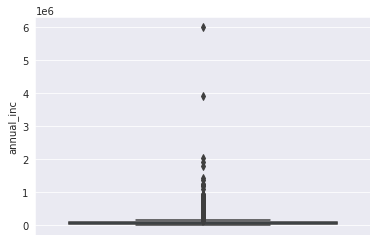

In [40]:
sns.boxplot(y = "annual_inc", data = df)

(array([3.9668e+04, 4.1000e+01, 4.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.0000e+03, 6.0360e+05, 1.2032e+06, 1.8028e+06, 2.4024e+06,
        3.0020e+06, 3.6016e+06, 4.2012e+06, 4.8008e+06, 5.4004e+06,
        6.0000e+06]),
 <a list of 10 Patch objects>)

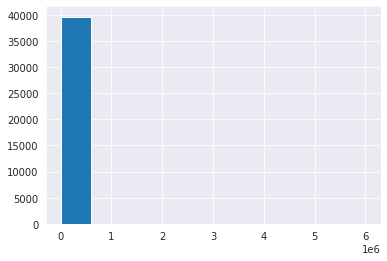

In [41]:
plt.hist(df["annual_inc"])

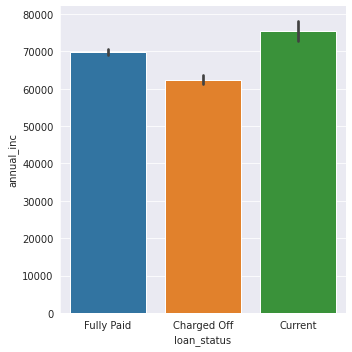

In [42]:
sns.catplot(x = "loan_status", y = "annual_inc", kind="bar", data=df)

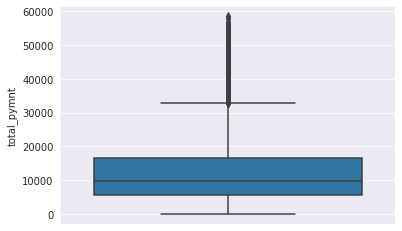

In [43]:
sns.boxplot(y = "total_pymnt", data = df)

(array([10861., 12438.,  7655.,  4056.,  2382.,  1281.,   565.,   307.,
          138.,    34.]),
 array([    0.      ,  5856.367993, 11712.735986, 17569.103979,
        23425.471972, 29281.839965, 35138.207958, 40994.575951,
        46850.943944, 52707.311937, 58563.67993 ]),
 <a list of 10 Patch objects>)

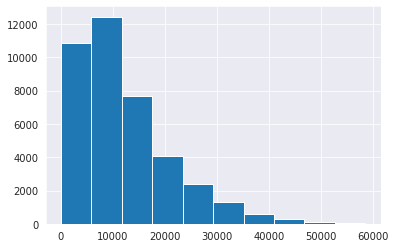

In [44]:
plt.hist(df["total_pymnt"])

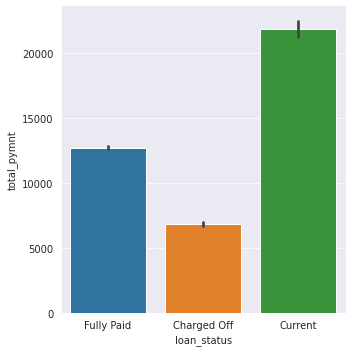

In [45]:
sns.catplot(x = "loan_status", y = "total_pymnt", kind="bar", data=df)

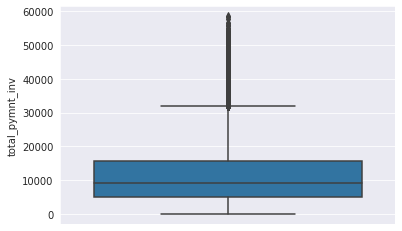

In [46]:
sns.boxplot(y = "total_pymnt_inv", data = df)

(array([12096., 12216.,  7356.,  3761.,  2191.,  1126.,   551.,   286.,
          110.,    24.]),
 array([    0.   ,  5856.368, 11712.736, 17569.104, 23425.472, 29281.84 ,
        35138.208, 40994.576, 46850.944, 52707.312, 58563.68 ]),
 <a list of 10 Patch objects>)

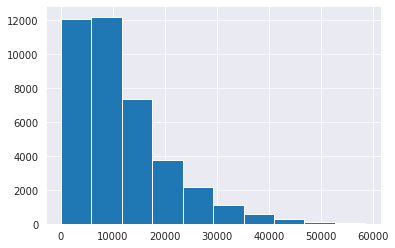

In [47]:
plt.hist(df["total_pymnt_inv"])

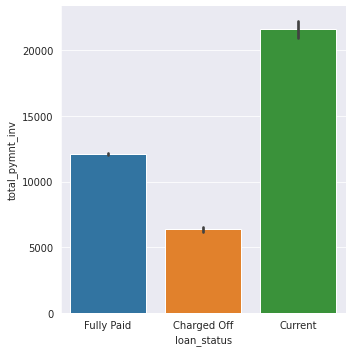

In [48]:
sns.catplot(x = "loan_status", y = "total_pymnt_inv", kind="bar", data=df)

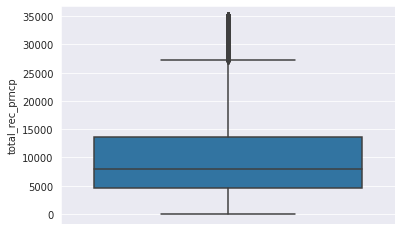

In [49]:
sns.boxplot(y = "total_rec_prncp", data = df)

(array([ 7326., 10142.,  7899.,  5056.,  3682.,  2578.,  1007.,  1189.,
          381.,   457.]),
 array([    0.   ,  3500.002,  7000.004, 10500.006, 14000.008, 17500.01 ,
        21000.012, 24500.014, 28000.016, 31500.018, 35000.02 ]),
 <a list of 10 Patch objects>)

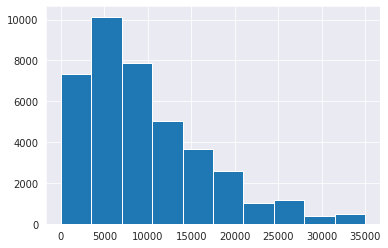

In [50]:
plt.hist(df["total_rec_prncp"])

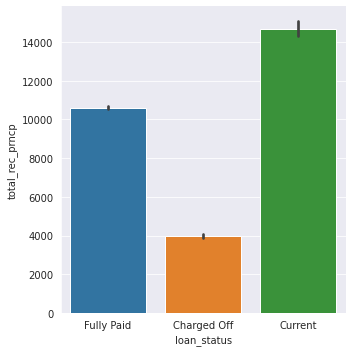

In [51]:
sns.catplot(x = "loan_status", y = "total_rec_prncp", kind="bar", data=df)

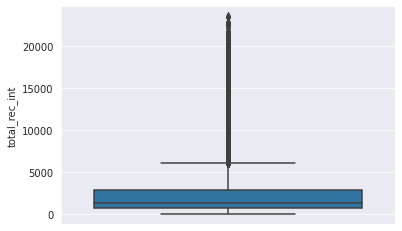

In [52]:
sns.boxplot(y = "total_rec_int", data = df)

(array([2.7572e+04, 7.2580e+03, 2.5900e+03, 1.1720e+03, 5.6100e+02,
        3.0900e+02, 1.2100e+02, 7.0000e+01, 4.4000e+01, 2.0000e+01]),
 array([    0.   ,  2356.368,  4712.736,  7069.104,  9425.472, 11781.84 ,
        14138.208, 16494.576, 18850.944, 21207.312, 23563.68 ]),
 <a list of 10 Patch objects>)

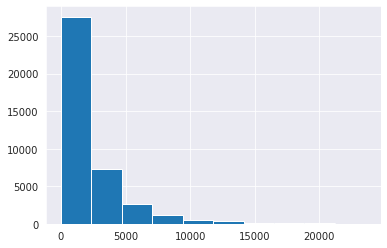

In [53]:
plt.hist(df["total_rec_int"])

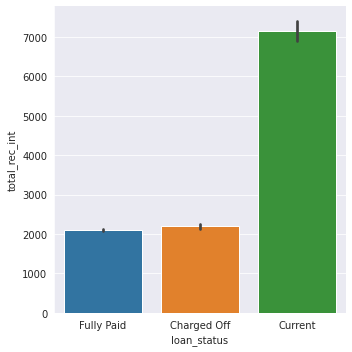

In [54]:
sns.catplot(x = "loan_status", y = "total_rec_int", kind="bar", data=df)

### Inference from graph
#### 1. Ouliers are presents in many columns
#### 2. All features are Positively distributed or right skewed

In [189]:
## Ouliers Treatment

In [55]:
IQR = df["loan_amnt"].quantile(0.75) - df["loan_amnt"].quantile(0.25)
upper_limit = df["loan_amnt"].quantile(0.75) + 1.5*IQR
lower_limit = df["loan_amnt"].quantile(0.25) - 1.5*IQR
data = np.where(df["loan_amnt"] > upper_limit, True, np.where(df["loan_amnt"] < lower_limit, True, False))
df = df.loc[~(data), ]

In [56]:
IQR = df["funded_amnt"].quantile(0.75) - df["funded_amnt"].quantile(0.25)
upper_limit = df["funded_amnt"].quantile(0.75) + 1.5*IQR
lower_limit = df["funded_amnt"].quantile(0.25) - 1.5*IQR
data = np.where(df["funded_amnt"] > upper_limit, True, np.where(df["funded_amnt"] < lower_limit, True, False))
df = df.loc[~(data), ]

In [57]:
IQR = df["total_rec_int"].quantile(0.75) - df["total_rec_int"].quantile(0.25)
upper_limit = df["total_rec_int"].quantile(0.75) + 1.5*IQR
lower_limit = df["total_rec_int"].quantile(0.25) - 1.5*IQR
data = np.where(df["total_rec_int"] > upper_limit, True, np.where(df["total_rec_int"] < lower_limit, True, False))
df = df.loc[~(data), ]

In [58]:
IQR = df["installment"].quantile(0.75) - df["installment"].quantile(0.25)
upper_limit = df["installment"].quantile(0.75) + 1.5*IQR
lower_limit = df["installment"].quantile(0.25) - 1.5*IQR
data = np.where(df["installment"] > upper_limit, True, np.where(df["installment"] < lower_limit, True, False))
df = df.loc[~(data), ]

In [59]:
IQR = df["annual_inc"].quantile(0.75) - df["annual_inc"].quantile(0.25)
upper_limit = df["annual_inc"].quantile(0.75) + 1.5*IQR
lower_limit = df["annual_inc"].quantile(0.25) - 1.5*IQR
data = np.where(df["annual_inc"] > upper_limit, True, np.where(df["annual_inc"] < lower_limit, True, False))
df = df.loc[~(data), ]

In [60]:
IQR = df["funded_amnt_inv"].quantile(0.75) - df["funded_amnt_inv"].quantile(0.25)
upper_limit = df["funded_amnt_inv"].quantile(0.75) + 1.5*IQR
lower_limit = df["funded_amnt_inv"].quantile(0.25) - 1.5*IQR
data = np.where(df["funded_amnt_inv"] > upper_limit, True, np.where(df["funded_amnt_inv"] < lower_limit, True, False))
df = df.loc[~(data), ]

In [61]:
IQR = df["total_pymnt"].quantile(0.75) - df["total_pymnt"].quantile(0.25)
upper_limit = df["total_pymnt"].quantile(0.75) + 1.5*IQR
lower_limit = df["total_pymnt"].quantile(0.25) - 1.5*IQR
data = np.where(df["total_pymnt"] > upper_limit, True, np.where(df["total_pymnt"] < lower_limit, True, False))
df = df.loc[~(data), ]

In [62]:
IQR = df["total_rec_prncp"].quantile(0.75) - df["total_rec_prncp"].quantile(0.25)
upper_limit = df["total_rec_prncp"].quantile(0.75) + 1.5*IQR
lower_limit = df["total_rec_prncp"].quantile(0.25) - 1.5*IQR
data = np.where(df["total_rec_prncp"] > upper_limit, True, np.where(df["total_rec_prncp"] < lower_limit, True, False))
df = df.loc[~(data), ]

In [63]:
IQR = df["total_pymnt_inv"].quantile(0.75) - df["total_pymnt_inv"].quantile(0.25)
upper_limit = df["total_pymnt_inv"].quantile(0.75) + 1.5*IQR
lower_limit = df["total_pymnt_inv"].quantile(0.25) - 1.5*IQR
data = np.where(df["total_pymnt_inv"] > upper_limit, True, np.where(df["total_pymnt_inv"] < lower_limit, True, False))
df = df.loc[~(data), ]

In [64]:
IQR = df["total_pymnt"].quantile(0.75) - df["total_pymnt"].quantile(0.25)
upper_limit = df["total_pymnt"].quantile(0.75) + 1.5*IQR
lower_limit = df["total_pymnt"].quantile(0.25) - 1.5*IQR
data = np.where(df["total_pymnt"] > upper_limit, True, np.where(df["total_pymnt"] < lower_limit, True, False))
df = df.loc[~(data), ]

## Bivariate Analysis

No handles with labels found to put in legend.


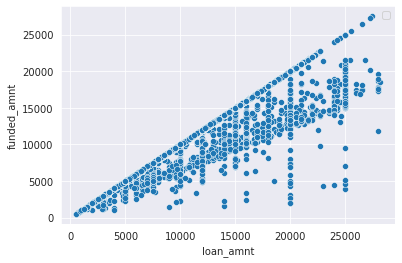

In [65]:
sns.scatterplot(x="loan_amnt", y="funded_amnt", data = df).legend()

No handles with labels found to put in legend.


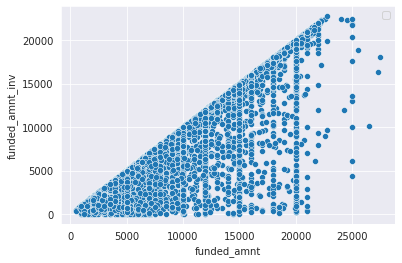

In [66]:
sns.scatterplot(x="funded_amnt", y="funded_amnt_inv", data = df).legend()

No handles with labels found to put in legend.


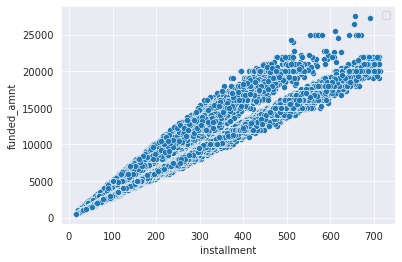

In [67]:
sns.scatterplot(x="installment", y="funded_amnt", data = df).legend()

No handles with labels found to put in legend.


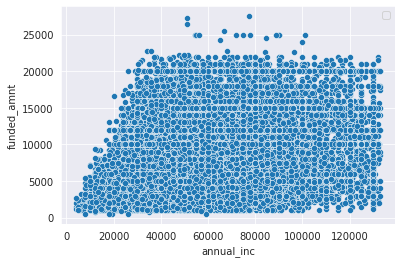

In [68]:
sns.scatterplot(x="annual_inc", y="funded_amnt", data = df).legend()

No handles with labels found to put in legend.


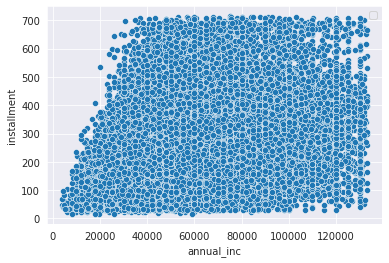

In [69]:
sns.scatterplot(x="annual_inc", y="installment", data = df).legend()

No handles with labels found to put in legend.


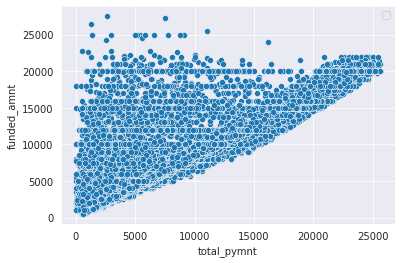

In [70]:
sns.scatterplot(x="total_pymnt", y="funded_amnt", data = df).legend()

No handles with labels found to put in legend.


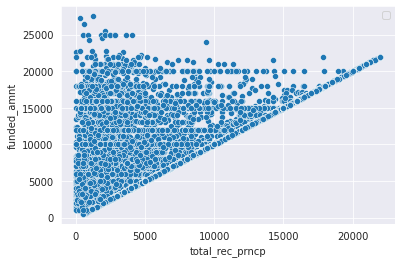

In [71]:
sns.scatterplot(x="total_rec_prncp", y="funded_amnt", data = df).legend()

No handles with labels found to put in legend.


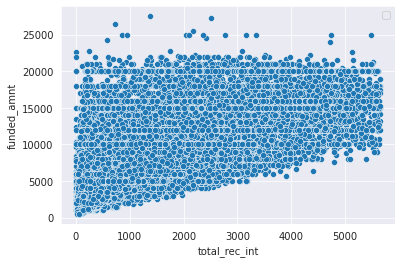

In [72]:
sns.scatterplot(x="total_rec_int", y="funded_amnt", data = df).legend()

### All columns independent to each other while installment and funded amnt and loan_amnt are directly proportion to each other

In [73]:
#Changing into numerical for model
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [74]:
def encoding(i):
    df[i] = lb.fit_transform(df[i])

In [75]:
encoding('term')
encoding('int_rate')
encoding('grade')
encoding('sub_grade')
encoding('emp_title')
encoding('emp_length')
encoding('home_ownership')
encoding('verification_status')
encoding('issue_d')
encoding('pymnt_plan')
encoding('url')
encoding('purpose')
encoding('title')
encoding('zip_code')
encoding('addr_state')
encoding('earliest_cr_line')
encoding('revol_util')
encoding('initial_list_status')
encoding('last_credit_pull_d')
encoding('application_type')
encoding('last_pymnt_d')

In [76]:
df.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int64
int_rate                        int64
installment                   float64
grade                           int64
sub_grade                       int64
emp_title                       int64
emp_length                      int64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
issue_d                         int64
loan_status                    object
pymnt_plan                      int64
url                             int64
purpose                         int64
title                           int64
zip_code                        int64
addr_state                      int64
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int64
inq_last_6mths                float64
open_acc                      float64
pub_rec     

In [77]:
#Arranging columns
df = df.iloc[:, [14,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]]

In [78]:
column_names = df.columns

In [79]:
zero_variance = df.var()

In [80]:
for i in range(0,51):
  if zero_variance[i] == 0:
    df.drop(column_names[i+1], inplace = True, axis = 1) 

In [81]:
#Defining a function for normalizing the function to same scale and unitless
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [82]:
column_names1 = df.columns

In [83]:
for i in range(1, 42):
  df[column_names1[i]] = norm_func(df[column_names1[i]])

In [84]:
#Correlation Matrix
cor = df.corr()

## Model Building

In [85]:
#Train test split
from sklearn.model_selection import train_test_split

In [86]:
train, test = train_test_split(df, test_size = 0.2)

In [87]:
#Importing Logistic Regression from Sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [90]:
#Model Building
#multinomial option is supported only by the lbfgs solvers
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg", max_iter = 100).fit(train.iloc[:, 1:], train.iloc[:, 0])

In [91]:
#Test predictions
test_predict = model.predict(test.iloc[:, 1:])

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
#Test accuracy 
accuracy_score(test.iloc[:,0], test_predict)

0.9809625342674383

In [94]:
#Train predictions
train_predict = model.predict(train.iloc[:, 1:])

In [95]:
#Train accuracy
accuracy_score(train.iloc[:,0], train_predict)

0.9831683168316832